In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
CAND1_PATH = "data/paredao2/babu.txt"
CAND2_PATH = "data/paredao2/petrix.csv"
CAND3_PATH = "data/paredao2/pyong.csv"
CAND4_PATH = "data/paredao2/hadson.csv"



In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)
candidate4_df = pd.read_csv(CAND4_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment"]]
cand2 = candidate2_df[["tweet", "sentiment"]]
cand3 = candidate3_df[["tweet", "sentiment"]]
cand4 = candidate4_df[["tweet", "sentiment"]]

# Babu

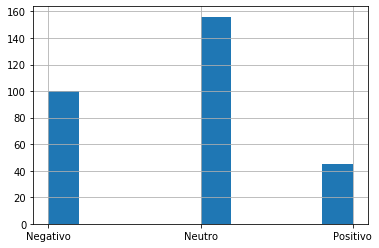

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment
0,Aí fica difícil 😡,Negativo
1,Querida eu não vi isso!\nMas ele sai de qualqu...,Negativo
2,A própria delegada já falou que não é assim ma...,Negativo
3,"Petrix não vai sair , ele pode dar depoimento ...",Neutro
4,Vamos Galera... Da tempo de mudar\n\n#bbb20 @t...,Neutro
...,...,...
296,amoooooo #ForaBabu,Positivo
297,"Esse jogo tá muito maravilhoso, e eu vou ser #...",Positivo
298,ATENÇÃO na hora que o Tiago anunciar a votação...,Negativo
299,Babu e Hadson: #ForaHadson \nBabu e Mari: #For...,Neutro


# Petrix (Eliminado)

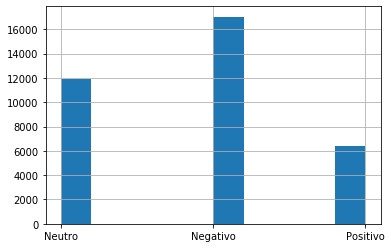

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment
0,#BBB20 Mais um paredão formado no BBB ! Petri...,Neutro
1,"Exatamente, na verdade o todos os homens envol...",Negativo
2,Kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk...,Neutro
3,"To com sono, mas preciso ver o @petrixbarbosa ...",Negativo
4,Assim como o @vandersonbrito foi desclassifica...,Negativo
...,...,...
35328,#FicaPetrix,Neutro
35329,Vamos lutar pra ele ficar #ficapetrix #bbb20,Positivo
35330,"#BBB20 Mano, eu nunca achei q ia falar isso, m...",Positivo
35331,"Ainda nem saiu o resultado do paredão, mais eu...",Negativo


# Pyong

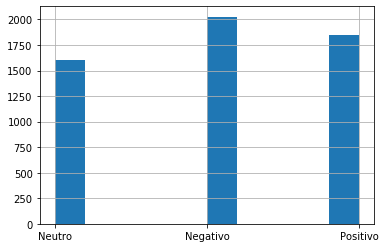

In [9]:
cand3["sentiment"].hist()

In [10]:
cand3

,tweet,sentiment
0,#BBB20 Mais um paredão formado no BBB ! Petri...,Neutro
1,Alguém arruma um Oscar pra esse @PyongLeeTV #B...,Negativo
2,pic.twitter.com/w6AsDkg6C2,Neutro
3,Esse Twitter tem que liberar editar.\nEscrevi ...,Negativo
4,pic.twitter.com/AsiyC4sXpw,Neutro
...,...,...
5475,"#BBB2O começa e nada de expulsão, é o que par...",Negativo
5476,Adoroooo \nO PETRIX VAI SAIR HAHAHAHHAHAHAH \n...,Positivo
5477,"o paredão, meu pai #RedeBBBB #PETRIXEXPULSO #F...",Neutro
5478,Postando aqui pq eu gostei jkkkkkk #forapretri...,Positivo


# Hadson

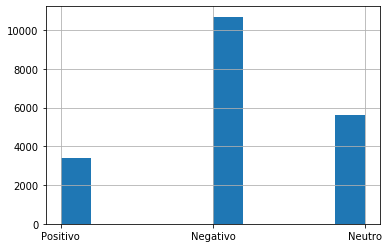

In [11]:
cand4["sentiment"].hist()

In [12]:
cand4

,tweet,sentiment
0,#Repost quebrandootabu (@get_repost)\n・・・\nSe ...,Positivo
1,Só que se @hadsonnery não sair vai parecer que...,Negativo
2,"Verdade @BruMarquezine , mas o mais escroto te...",Negativo
3,Petrix primeiro.,Neutro
4,"#BBB20 @Boninho , eu tô com tanto nojo de @had...",Negativo
...,...,...
19689,#FicaHadson\n pic.twitter.com/8KFJGKWHbv,Neutro
19690,#FicaHadson HAUAHAUAHAUA.. precisamos de você ...,Positivo
19691,Já sou #ficahadson pq ele vai com 3 camarotes ...,Negativo
19692,A maldição do meu Nick team atacará novamente?...,Negativo


# Quantidades absolutas

In [13]:
candidates = {"babu": cand1, "petrix": cand2, "pyong": cand3, "hadson": cand4}

In [14]:
qtds_df = get_raw_quantities(candidates)

In [15]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,45,156,100
petrix,6395,11899,17039
pyong,1846,1607,2027
hadson,3410,5599,10685


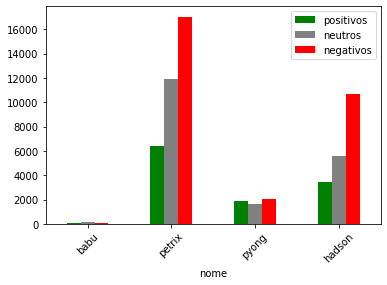

In [16]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [17]:
pcts_df = get_pct_by_candidate(candidates)

In [18]:
pcts_df

,positivos,neutros,negativos
nome,,,
babu,0.149502,0.518272,0.332226
petrix,0.180992,0.336767,0.482240
pyong,0.336861,0.293248,0.369891
hadson,0.173149,0.284300,0.542551


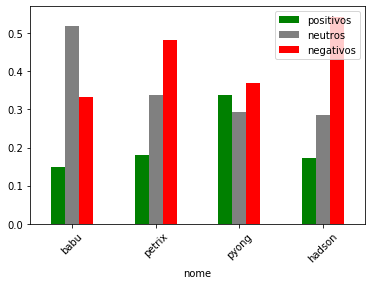

In [19]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [20]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [21]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,0.003847,0.008099,0.003350
petrix,0.546768,0.617777,0.570802
pyong,0.157832,0.083433,0.067904
hadson,0.291553,0.290691,0.357944


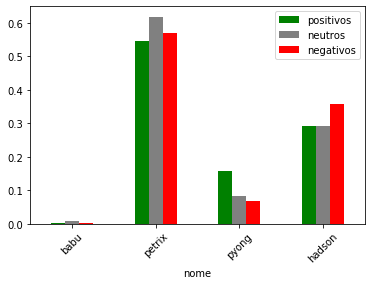

In [22]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])